In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
dataset_1 = pd.get_dummies(dataset['Geography'],drop_first=True)

In [17]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Germany  10000 non-null  uint8
 1   Spain    10000 non-null  uint8
dtypes: uint8(2)
memory usage: 19.7 KB


In [10]:
df=pd.concat([dataset,dataset_1],axis=1)

In [11]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Germany          10000 non-null  uint8  
 15  Spain            10000 non-null  uint8  
dtypes: float64(2), int64(9), object(3), uint8(2)
memory usage: 

In [12]:
X = df.drop(['RowNumber','CustomerId','Surname','Exited','Geography'],axis=1).values

In [13]:
X

array([[619, 'Female', 42, ..., 101348.88, 0, 0],
       [608, 'Female', 41, ..., 112542.58, 0, 1],
       [502, 'Female', 42, ..., 113931.57, 0, 0],
       ...,
       [709, 'Female', 36, ..., 42085.58, 0, 0],
       [772, 'Male', 42, ..., 92888.52, 1, 0],
       [792, 'Female', 28, ..., 38190.78, 0, 0]], dtype=object)

In [14]:
y= dataset['Exited'].values

In [15]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder() # to encode the gender
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])



In [55]:
X.shape

(10000, 11)

In [24]:
X

array([[619, 0, 42, ..., 101348.88, 0, 0],
       [608, 0, 41, ..., 112542.58, 0, 1],
       [502, 0, 42, ..., 113931.57, 0, 0],
       ...,
       [709, 0, 36, ..., 42085.58, 0, 0],
       [772, 1, 42, ..., 92888.52, 1, 0],
       [792, 0, 28, ..., 38190.78, 0, 0]], dtype=object)

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [27]:
X_train

array([[ 0.16958176, -1.09168714, -0.46460796, ...,  1.10643166,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.91601335,  0.30102557, ..., -0.74866447,
         1.75486502, -0.57369368],
       [-1.19119591, -1.09168714, -0.94312892, ...,  1.48533467,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 ,  0.91601335, -0.36890377, ...,  1.41231994,
        -0.5698444 , -0.57369368],
       [-0.62420521, -1.09168714, -0.08179119, ...,  0.84432121,
        -0.5698444 ,  1.74309049],
       [-0.28401079, -1.09168714,  0.87525072, ...,  0.32472465,
         1.75486502, -0.57369368]])

In [18]:
# ANN
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

In [61]:
model = Sequential()

In [69]:
model.add ( Dense(6, activation ='relu',kernel_initializer = 'glorot_uniform'))

model.add ( Dense(6, activation ='relu',kernel_initializer = 'glorot_uniform'))

model.add(Dense(1,activation = 'sigmoid'))

model.compile (loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#output_dim = no. of nodes to add in first layer = average of no. of inputs and output, in this case 12/2 =6

In [70]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test), epochs = 100, batch_size = 10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 2s 227us/sample - loss: 0.5218 - acc: 0.7960 - val_loss: 0.4875 - val_acc: 0.7975
Epoch 2/100
8000/8000 [==============================] - 2s 205us/sample - loss: 0.4675 - acc: 0.7960 - val_loss: 0.4489 - val_acc: 0.7975
Epoch 3/100
8000/8000 [==============================] - 1s 172us/sample - loss: 0.4431 - acc: 0.7960 - val_loss: 0.4369 - val_acc: 0.7975
Epoch 4/100
8000/8000 [==============================] - 1s 176us/sample - loss: 0.4338 - acc: 0.7960 - val_loss: 0.4307 - val_acc: 0.7975
Epoch 5/100
8000/8000 [==============================] - 1s 176us/sample - loss: 0.4300 - acc: 0.7960 - val_loss: 0.4272 - val_acc: 0.7975
Epoch 6/100
8000/8000 [==============================] - 1s 176us/sample - loss: 0.4278 - acc: 0.7964 - val_loss: 0.4279 - val_acc: 0.7975
Epoch 7/100
8000/8000 [=

Epoch 57/100
8000/8000 [==============================] - 2s 207us/sample - loss: 0.3397 - acc: 0.8633 - val_loss: 0.3470 - val_acc: 0.8640
Epoch 58/100
8000/8000 [==============================] - 1s 170us/sample - loss: 0.3394 - acc: 0.8629 - val_loss: 0.3487 - val_acc: 0.8595
Epoch 59/100
8000/8000 [==============================] - 1s 176us/sample - loss: 0.3396 - acc: 0.8644 - val_loss: 0.3480 - val_acc: 0.8545
Epoch 60/100
8000/8000 [==============================] - 1s 177us/sample - loss: 0.3395 - acc: 0.8651 - val_loss: 0.3465 - val_acc: 0.8605
Epoch 61/100
8000/8000 [==============================] - 1s 176us/sample - loss: 0.3392 - acc: 0.8658 - val_loss: 0.3480 - val_acc: 0.8610
Epoch 62/100
8000/8000 [==============================] - 1s 173us/sample - loss: 0.3387 - acc: 0.8636 - val_loss: 0.3492 - val_acc: 0.8615
Epoch 63/100
8000/8000 [==============================] - 1s 176us/sample - loss: 0.3385 - acc: 0.8646 - val_loss: 0.3465 - val_acc: 0.8615
Epoch 64/100
8000/80

In [80]:
model.fit(x=X_train,y=y_train, epochs = 100, batch_size = 10)

Epoch 1/100
8000/8000 [==============================] - 1s 157us/sample - loss: 0.3357 - acc: 0.8637
Epoch 2/100
8000/8000 [==============================] - 1s 157us/sample - loss: 0.3349 - acc: 0.8645
Epoch 3/100
8000/8000 [==============================] - 1s 155us/sample - loss: 0.3346 - acc: 0.8659
Epoch 4/100
8000/8000 [==============================] - 1s 156us/sample - loss: 0.3351 - acc: 0.8655
Epoch 5/100
8000/8000 [==============================] - 1s 173us/sample - loss: 0.3346 - acc: 0.8651
Epoch 6/100
8000/8000 [==============================] - 2s 229us/sample - loss: 0.3347 - acc: 0.8622
Epoch 7/100
8000/8000 [==============================] - 2s 213us/sample - loss: 0.3345 - acc: 0.8656
Epoch 8/100
8000/8000 [==============================] - 2s 202us/sample - loss: 0.3351 - acc: 0.8636
Epoch 9/100
8000/8000 [==============================] - 2s 207us/sample - loss: 0.3349 - acc: 0.8621
Epoch 10/100
8000/8000 [==============================] - 1s 162us/sample - loss: 

In [83]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_test,y_pred)

In [85]:
cm

array([[1525,   70],
       [ 209,  196]], dtype=int64)

In [86]:
Accuracy = (1525+196)/(2000)

In [87]:
Accuracy

0.8605

In [1]:
#Improving the bias-varince trade-off using K-Fold Cross Validation

In [30]:
import tensorflow as tf

In [31]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [6]:
from sklearn.model_selection import cross_val_score

In [10]:
def build_classifier():
    model = Sequential()
    model.add ( Dense(6, activation ='relu',kernel_initializer = 'glorot_uniform'))

    model.add ( Dense(6, activation ='relu',kernel_initializer = 'glorot_uniform'))

    model.add(Dense(1,activation = 'sigmoid'))

    model.compile (loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return classifier
model = KerasClassifier(build_fn=build_classifier, batch_size=10, epochs = 100)

In [1]:
#accuracies = cross_val_score(estimator = model, X= X_train, y = y_train,cv = 10,  )

In [19]:
#ANN with the model to detect overfitting
model = Sequential()

model.add ( Dense(6, activation ='relu',kernel_initializer = 'glorot_uniform'))

model.add ( Dense(6, activation ='relu',kernel_initializer = 'glorot_uniform'))

model.add(Dense(1,activation = 'sigmoid'))

model.compile (loss='binary_crossentropy', optimizer='adam')
#output_dim = no. of nodes to add in first layer = average of no. of inputs and output, in this case 12/2 =6

model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test), epochs = 100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 140us/sample - loss: 0.5872 - val_loss: 0.4975
Epoch 2/100
8000/8000 [==============================] - 1s 67us/sample - loss: 0.4730 - val_loss: 0.4637
Epoch 3/100
8000/8000 [==============================] - 0s 50us/sample - loss: 0.4510 - val_loss: 0.4447
Epoch 4/100
8000/8000 [==============================] - 0s 54us/sample - loss: 0.4364 - val_loss: 0.4316
Epoch 5/100
8000/8000 [==============================] - 0s 50us/sample - loss: 0.4283 - val_loss: 0.4244
Epoch 6/100
8000/8000 [==============================] - 0s 52us/sample - loss: 0.4233 - val_loss: 0.4194
Epoch 7/100
8000/8000 [==============================] - 0s 51us/sample - loss: 0.4192 - val_loss: 0.4147
Epoch 8/100
8000/8000 [==============================] - 0s 51us/sample - loss: 0.4155 - val_loss: 0.4111
Epoch 9/1

8000/8000 [==============================] - 0s 48us/sample - loss: 0.3375 - val_loss: 0.3384
Epoch 75/100
8000/8000 [==============================] - 0s 49us/sample - loss: 0.3376 - val_loss: 0.3398
Epoch 76/100
8000/8000 [==============================] - 0s 49us/sample - loss: 0.3371 - val_loss: 0.3385
Epoch 77/100
8000/8000 [==============================] - 0s 50us/sample - loss: 0.3373 - val_loss: 0.3366
Epoch 78/100
8000/8000 [==============================] - 0s 55us/sample - loss: 0.3372 - val_loss: 0.3375
Epoch 79/100
8000/8000 [==============================] - ETA: 0s - loss: 0.338 - 0s 54us/sample - loss: 0.3374 - val_loss: 0.3379
Epoch 80/100
8000/8000 [==============================] - 0s 60us/sample - loss: 0.3370 - val_loss: 0.3391
Epoch 81/100
8000/8000 [==============================] - 0s 57us/sample - loss: 0.3368 - val_loss: 0.3428
Epoch 82/100
8000/8000 [==============================] - 0s 51us/sample - loss: 0.3375 - val_loss: 0.3380
Epoch 83/100
8000/8000 [==

In [24]:
Loss_comp = pd.DataFrame(model.history.history)

In [25]:
Loss_comp.columns =['TainingData_Loss', 'ValData_Loss']
Loss_comp

,TainingData_Loss,ValData_Loss
0,0.587217,0.497479
1,0.473030,0.463687
2,0.450993,0.444735
3,0.436431,0.431588
4,0.428292,0.424412
...,...,...
95,0.335142,0.336779
96,0.335094,0.341914
97,0.335636,0.339251
98,0.335045,0.339093


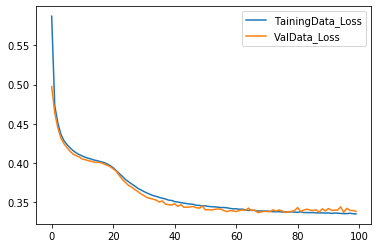

In [26]:
Loss_comp.plot()

In [27]:
# There doesn't seem to be much of an over-fitting

In [33]:
from sklearn.model_selection import GridSearchCV

In [42]:
def build_classifier(optimiser):
    model = Sequential()
    model.add ( Dense(6, activation ='relu',kernel_initializer = 'glorot_uniform'))

    model.add ( Dense(6, activation ='relu',kernel_initializer = 'glorot_uniform'))

    model.add(Dense(1,activation = 'sigmoid'))

    model.compile (loss='binary_crossentropy', optimizer=optimiser, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=build_classifier)
parameters = {'batch_size': [25,32],
             'epochs' :[ 100,200],
             'optimiser':['adam','rnsprop']}
grid_search = GridSearchCV(estimator = model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = None)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/100
6400/6400 [==============================] - 0s 76us/sample - loss: 0.5401 - acc: 0.7978
Epoch 2/100
6400/6400 [==============================] - 0s 53us/sample - loss: 0.4829 - acc: 0.7980
Epoch 3/100
6400/6400 [==============================] - 0s 52us/sample - loss: 0.4560 - acc: 0.7980
Epoch 4/100
6400/6400 [==============================] - 0s 51us/sample - loss: 0.4412 - acc: 0.7991
Epoch 5/100
6400/6400 [==============================] - 0s 55us/sample - loss: 0.4330 - acc: 0.8034
Epoch 6/100
6400/6400 [==============================] - 0s 53us/sample - loss: 0.4274 - acc: 0.8097
Epoch 7/100
6400/6400 [==============================] - 0s 54us/sample - loss: 0.4243 - acc: 0.8136
Epoch 8/100
6400/6400 [==============================] - 0s 50us/sample - loss: 0.4213 - acc: 0.8161
Epoch 9/100
6400/6400 [==============================] - 0s 50us/sample - loss: 0.4181 - acc: 0.8202
Epoch 10/100
6400/6400 [==============================] - 0s 55us/sample - loss: 0.4151 - a

6400/6400 [==============================] - 0s 50us/sample - loss: 0.3384 - acc: 0.8627
Epoch 81/100
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3380 - acc: 0.8609
Epoch 82/100
6400/6400 [==============================] - 0s 50us/sample - loss: 0.3391 - acc: 0.8602
Epoch 83/100
6400/6400 [==============================] - 0s 50us/sample - loss: 0.3378 - acc: 0.8627
Epoch 84/100
6400/6400 [==============================] - 0s 50us/sample - loss: 0.3371 - acc: 0.8622
Epoch 85/100
6400/6400 [==============================] - 0s 55us/sample - loss: 0.3373 - acc: 0.8620
Epoch 86/100
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3376 - acc: 0.8625
Epoch 87/100
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3364 - acc: 0.8639
Epoch 88/100
6400/6400 [==============================] - 0s 50us/sample - loss: 0.3368 - acc: 0.8611
Epoch 89/100
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3366 - acc: 

6400/6400 [==============================] - 0s 50us/sample - loss: 0.3377 - acc: 0.8600
Epoch 61/100
6400/6400 [==============================] - 0s 50us/sample - loss: 0.3374 - acc: 0.8616
Epoch 62/100
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3375 - acc: 0.8619
Epoch 63/100
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3366 - acc: 0.8612
Epoch 64/100
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3373 - acc: 0.8600
Epoch 65/100
6400/6400 [==============================] - 0s 50us/sample - loss: 0.3375 - acc: 0.8600
Epoch 66/100
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3369 - acc: 0.8625
Epoch 67/100
6400/6400 [==============================] - 0s 50us/sample - loss: 0.3367 - acc: 0.8606
Epoch 68/100
6400/6400 [==============================] - 0s 54us/sample - loss: 0.3368 - acc: 0.8598
Epoch 69/100
6400/6400 [==============================] - 0s 50us/sample - loss: 0.3367 - acc: 

6400/6400 [==============================] - 0s 56us/sample - loss: 0.3432 - acc: 0.8612
Epoch 41/100
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3432 - acc: 0.8606
Epoch 42/100
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3426 - acc: 0.8603
Epoch 43/100
6400/6400 [==============================] - 0s 63us/sample - loss: 0.3425 - acc: 0.8614
Epoch 44/100
6400/6400 [==============================] - 0s 62us/sample - loss: 0.3418 - acc: 0.8616
Epoch 45/100
6400/6400 [==============================] - 0s 66us/sample - loss: 0.3418 - acc: 0.8602
Epoch 46/100
6400/6400 [==============================] - 0s 67us/sample - loss: 0.3412 - acc: 0.8609
Epoch 47/100
6400/6400 [==============================] - 0s 57us/sample - loss: 0.3414 - acc: 0.8617
Epoch 48/100
6400/6400 [==============================] - 0s 56us/sample - loss: 0.3412 - acc: 0.8622
Epoch 49/100
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3407 - acc: 

Epoch 20/100
6400/6400 [==============================] - 0s 53us/sample - loss: 0.3449 - acc: 0.8586
Epoch 21/100
6400/6400 [==============================] - 0s 53us/sample - loss: 0.3442 - acc: 0.8577
Epoch 22/100
6400/6400 [==============================] - 0s 55us/sample - loss: 0.3434 - acc: 0.8597
Epoch 23/100
6400/6400 [==============================] - 0s 55us/sample - loss: 0.3431 - acc: 0.8605
Epoch 24/100
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3427 - acc: 0.8605
Epoch 25/100
6400/6400 [==============================] - 0s 54us/sample - loss: 0.3430 - acc: 0.8589
Epoch 26/100
6400/6400 [==============================] - 0s 55us/sample - loss: 0.3420 - acc: 0.8598
Epoch 27/100
6400/6400 [==============================] - 0s 53us/sample - loss: 0.3413 - acc: 0.8603
Epoch 28/100
6400/6400 [==============================] - 0s 53us/sample - loss: 0.3413 - acc: 0.8600
Epoch 29/100
6400/6400 [==============================] - 0s 52us/sample - loss: 0

6400/6400 [==============================] - 0s 54us/sample - loss: 0.3332 - acc: 0.8612
Epoch 100/100
6400/6400 [==============================] - 0s 56us/sample - loss: 0.3329 - acc: 0.8622
Epoch 1/100
6400/6400 [==============================] - 1s 82us/sample - loss: 0.6109 - acc: 0.7231
Epoch 2/100
6400/6400 [==============================] - 0s 55us/sample - loss: 0.4780 - acc: 0.8003
Epoch 3/100
6400/6400 [==============================] - 0s 61us/sample - loss: 0.4425 - acc: 0.8114
Epoch 4/100
6400/6400 [==============================] - 0s 55us/sample - loss: 0.4259 - acc: 0.8205
Epoch 5/100
6400/6400 [==============================] - 0s 54us/sample - loss: 0.4177 - acc: 0.8256
Epoch 6/100
6400/6400 [==============================] - 0s 53us/sample - loss: 0.4125 - acc: 0.8305
Epoch 7/100
6400/6400 [==============================] - 0s 54us/sample - loss: 0.4091 - acc: 0.8308
Epoch 8/100
6400/6400 [==============================] - 0s 54us/sample - loss: 0.4060 - acc: 0.8325


6400/6400 [==============================] - 0s 63us/sample - loss: 0.3275 - acc: 0.8620
Epoch 80/100
6400/6400 [==============================] - 0s 68us/sample - loss: 0.3271 - acc: 0.8614
Epoch 81/100
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3275 - acc: 0.8630
Epoch 82/100
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3273 - acc: 0.8623
Epoch 83/100
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3271 - acc: 0.8631
Epoch 84/100
6400/6400 [==============================] - 0s 54us/sample - loss: 0.3271 - acc: 0.8620
Epoch 85/100
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3272 - acc: 0.8616
Epoch 86/100
6400/6400 [==============================] - 0s 54us/sample - loss: 0.3267 - acc: 0.8630
Epoch 87/100
6400/6400 [==============================] - 0s 55us/sample - loss: 0.3266 - acc: 0.8633
Epoch 88/100
6400/6400 [==============================] - 0s 57us/sample - loss: 0.3268 - acc: 

6400/6400 [==============================] - 0s 57us/sample - loss: 0.3356 - acc: 0.8625
Epoch 60/200
6400/6400 [==============================] - 0s 56us/sample - loss: 0.3356 - acc: 0.8628
Epoch 61/200
6400/6400 [==============================] - 0s 66us/sample - loss: 0.3358 - acc: 0.8627
Epoch 62/200
6400/6400 [==============================] - 0s 59us/sample - loss: 0.3352 - acc: 0.8637
Epoch 63/200
6400/6400 [==============================] - 0s 56us/sample - loss: 0.3355 - acc: 0.8630
Epoch 64/200
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3349 - acc: 0.8634
Epoch 65/200
6400/6400 [==============================] - 0s 56us/sample - loss: 0.3351 - acc: 0.8628
Epoch 66/200
6400/6400 [==============================] - 0s 55us/sample - loss: 0.3350 - acc: 0.8627
Epoch 67/200
6400/6400 [==============================] - 0s 57us/sample - loss: 0.3344 - acc: 0.8631
Epoch 68/200
6400/6400 [==============================] - 0s 57us/sample - loss: 0.3346 - acc: 

6400/6400 [==============================] - 0s 60us/sample - loss: 0.3307 - acc: 0.8647
Epoch 139/200
6400/6400 [==============================] - 0s 62us/sample - loss: 0.3303 - acc: 0.8637
Epoch 140/200
6400/6400 [==============================] - 0s 60us/sample - loss: 0.3303 - acc: 0.8647
Epoch 141/200
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3305 - acc: 0.8636
Epoch 142/200
6400/6400 [==============================] - 0s 59us/sample - loss: 0.3304 - acc: 0.8631
Epoch 143/200
6400/6400 [==============================] - 0s 56us/sample - loss: 0.3301 - acc: 0.8637
Epoch 144/200
6400/6400 [==============================] - 0s 55us/sample - loss: 0.3305 - acc: 0.8647
Epoch 145/200
6400/6400 [==============================] - 0s 56us/sample - loss: 0.3301 - acc: 0.8633
Epoch 146/200
6400/6400 [==============================] - 0s 61us/sample - loss: 0.3303 - acc: 0.8653
Epoch 147/200
6400/6400 [==============================] - 0s 70us/sample - loss: 0.330

Epoch 18/200
6400/6400 [==============================] - 0s 61us/sample - loss: 0.3538 - acc: 0.8533
Epoch 19/200
6400/6400 [==============================] - 0s 62us/sample - loss: 0.3520 - acc: 0.8537
Epoch 20/200
6400/6400 [==============================] - 0s 76us/sample - loss: 0.3509 - acc: 0.8537
Epoch 21/200
6400/6400 [==============================] - 0s 60us/sample - loss: 0.3495 - acc: 0.8542
Epoch 22/200
6400/6400 [==============================] - 0s 65us/sample - loss: 0.3485 - acc: 0.8547
Epoch 23/200
6400/6400 [==============================] - 0s 73us/sample - loss: 0.3474 - acc: 0.8548
Epoch 24/200
6400/6400 [==============================] - 0s 70us/sample - loss: 0.3467 - acc: 0.8550
Epoch 25/200
6400/6400 [==============================] - 0s 75us/sample - loss: 0.3455 - acc: 0.8570
Epoch 26/200
6400/6400 [==============================] - 0s 72us/sample - loss: 0.3450 - acc: 0.8562
Epoch 27/200
6400/6400 [==============================] - 0s 72us/sample - loss: 0

6400/6400 [==============================] - 0s 61us/sample - loss: 0.3309 - acc: 0.8644
Epoch 99/200
6400/6400 [==============================] - 0s 60us/sample - loss: 0.3305 - acc: 0.8630
Epoch 100/200
6400/6400 [==============================] - 0s 57us/sample - loss: 0.3308 - acc: 0.8637
Epoch 101/200
6400/6400 [==============================] - 0s 56us/sample - loss: 0.3306 - acc: 0.8637
Epoch 102/200
6400/6400 [==============================] - 0s 57us/sample - loss: 0.3307 - acc: 0.8630
Epoch 103/200
6400/6400 [==============================] - 0s 57us/sample - loss: 0.3303 - acc: 0.8637
Epoch 104/200
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3299 - acc: 0.8633
Epoch 105/200
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3304 - acc: 0.8633
Epoch 106/200
6400/6400 [==============================] - 0s 57us/sample - loss: 0.3308 - acc: 0.8647
Epoch 107/200
6400/6400 [==============================] - 0s 66us/sample - loss: 0.3302

6400/6400 [==============================] - 0s 57us/sample - loss: 0.3285 - acc: 0.8644
Epoch 178/200
6400/6400 [==============================] - 0s 57us/sample - loss: 0.3285 - acc: 0.8619
Epoch 179/200
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3285 - acc: 0.8639
Epoch 180/200
6400/6400 [==============================] - 0s 57us/sample - loss: 0.3282 - acc: 0.8637
Epoch 181/200
6400/6400 [==============================] - 0s 57us/sample - loss: 0.3280 - acc: 0.8636
Epoch 182/200
6400/6400 [==============================] - 0s 63us/sample - loss: 0.3280 - acc: 0.8637
Epoch 183/200
6400/6400 [==============================] - 0s 64us/sample - loss: 0.3279 - acc: 0.8623
Epoch 184/200
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3281 - acc: 0.8625
Epoch 185/200
6400/6400 [==============================] - 0s 70us/sample - loss: 0.3281 - acc: 0.8641
Epoch 186/200
6400/6400 [==============================] - 0s 67us/sample - loss: 0.328

6400/6400 [==============================] - 0s 59us/sample - loss: 0.3376 - acc: 0.8633
Epoch 58/200
6400/6400 [==============================] - 0s 63us/sample - loss: 0.3376 - acc: 0.8620
Epoch 59/200
6400/6400 [==============================] - 0s 62us/sample - loss: 0.3377 - acc: 0.8608
Epoch 60/200
6400/6400 [==============================] - 0s 59us/sample - loss: 0.3377 - acc: 0.8609
Epoch 61/200
6400/6400 [==============================] - 0s 62us/sample - loss: 0.3372 - acc: 0.8627
Epoch 62/200
6400/6400 [==============================] - 0s 61us/sample - loss: 0.3371 - acc: 0.8637
Epoch 63/200
6400/6400 [==============================] - 0s 57us/sample - loss: 0.3375 - acc: 0.8627
Epoch 64/200
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3373 - acc: 0.8611
Epoch 65/200
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3372 - acc: 0.8611
Epoch 66/200
6400/6400 [==============================] - 0s 57us/sample - loss: 0.3368 - acc: 

6400/6400 [==============================] - 0s 59us/sample - loss: 0.3336 - acc: 0.8637
Epoch 138/200
6400/6400 [==============================] - 0s 61us/sample - loss: 0.3334 - acc: 0.8631
Epoch 139/200
6400/6400 [==============================] - 0s 62us/sample - loss: 0.3338 - acc: 0.8639
Epoch 140/200
6400/6400 [==============================] - 0s 59us/sample - loss: 0.3335 - acc: 0.8636
Epoch 141/200
6400/6400 [==============================] - 0s 59us/sample - loss: 0.3339 - acc: 0.8614
Epoch 142/200
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3337 - acc: 0.86310s - loss: 0.3353 - acc: 0
Epoch 143/200
6400/6400 [==============================] - 0s 62us/sample - loss: 0.3333 - acc: 0.8623
Epoch 144/200
6400/6400 [==============================] - 0s 72us/sample - loss: 0.3336 - acc: 0.8631
Epoch 145/200
6400/6400 [==============================] - 0s 64us/sample - loss: 0.3332 - acc: 0.8622
Epoch 146/200
6400/6400 [==============================] - 0s

6400/6400 [==============================] - 0s 68us/sample - loss: 0.3464 - acc: 0.8584
Epoch 17/200
6400/6400 [==============================] - 0s 66us/sample - loss: 0.3454 - acc: 0.8594
Epoch 18/200
6400/6400 [==============================] - 0s 71us/sample - loss: 0.3451 - acc: 0.8612
Epoch 19/200
6400/6400 [==============================] - 0s 60us/sample - loss: 0.3440 - acc: 0.8603
Epoch 20/200
6400/6400 [==============================] - 0s 66us/sample - loss: 0.3431 - acc: 0.8597
Epoch 21/200
6400/6400 [==============================] - 0s 60us/sample - loss: 0.3428 - acc: 0.8591
Epoch 22/200
6400/6400 [==============================] - 0s 63us/sample - loss: 0.3420 - acc: 0.8602
Epoch 23/200
6400/6400 [==============================] - 0s 62us/sample - loss: 0.3413 - acc: 0.8605
Epoch 24/200
6400/6400 [==============================] - 0s 70us/sample - loss: 0.3407 - acc: 0.8598
Epoch 25/200
6400/6400 [==============================] - 0s 62us/sample - loss: 0.3408 - acc: 

6400/6400 [==============================] - 0s 58us/sample - loss: 0.3310 - acc: 0.8636
Epoch 97/200
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3312 - acc: 0.8644
Epoch 98/200
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3311 - acc: 0.8628
Epoch 99/200
6400/6400 [==============================] - 0s 59us/sample - loss: 0.3310 - acc: 0.8647
Epoch 100/200
6400/6400 [==============================] - 0s 59us/sample - loss: 0.3311 - acc: 0.8630
Epoch 101/200
6400/6400 [==============================] - 0s 59us/sample - loss: 0.3306 - acc: 0.8639
Epoch 102/200
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3311 - acc: 0.8637
Epoch 103/200
6400/6400 [==============================] - 0s 61us/sample - loss: 0.3308 - acc: 0.8642
Epoch 104/200
6400/6400 [==============================] - 0s 63us/sample - loss: 0.3307 - acc: 0.8630
Epoch 105/200
6400/6400 [==============================] - 0s 61us/sample - loss: 0.3305 -

6400/6400 [==============================] - 1s 85us/sample - loss: 0.3275 - acc: 0.8636
Epoch 176/200
6400/6400 [==============================] - 0s 72us/sample - loss: 0.3267 - acc: 0.8658
Epoch 177/200
6400/6400 [==============================] - 0s 66us/sample - loss: 0.3270 - acc: 0.8647
Epoch 178/200
6400/6400 [==============================] - 0s 70us/sample - loss: 0.3272 - acc: 0.8631
Epoch 179/200
6400/6400 [==============================] - 0s 59us/sample - loss: 0.3267 - acc: 0.8655
Epoch 180/200
6400/6400 [==============================] - 0s 60us/sample - loss: 0.3271 - acc: 0.8633
Epoch 181/200
6400/6400 [==============================] - 0s 61us/sample - loss: 0.3268 - acc: 0.8645
Epoch 182/200
6400/6400 [==============================] - 0s 59us/sample - loss: 0.3267 - acc: 0.8641
Epoch 183/200
6400/6400 [==============================] - 0s 62us/sample - loss: 0.3269 - acc: 0.8639
Epoch 184/200
6400/6400 [==============================] - 0s 62us/sample - loss: 0.326

6400/6400 [==============================] - 0s 59us/sample - loss: 0.3363 - acc: 0.8614
Epoch 56/200
6400/6400 [==============================] - 0s 63us/sample - loss: 0.3366 - acc: 0.8603
Epoch 57/200
6400/6400 [==============================] - 0s 59us/sample - loss: 0.3359 - acc: 0.8612
Epoch 58/200
6400/6400 [==============================] - 0s 62us/sample - loss: 0.3357 - acc: 0.8616
Epoch 59/200
6400/6400 [==============================] - 0s 60us/sample - loss: 0.3359 - acc: 0.8622
Epoch 60/200
6400/6400 [==============================] - 0s 63us/sample - loss: 0.3354 - acc: 0.8617
Epoch 61/200
6400/6400 [==============================] - 0s 61us/sample - loss: 0.3353 - acc: 0.8612
Epoch 62/200
6400/6400 [==============================] - 0s 63us/sample - loss: 0.3353 - acc: 0.8608
Epoch 63/200
6400/6400 [==============================] - 0s 63us/sample - loss: 0.3347 - acc: 0.8614
Epoch 64/200
6400/6400 [==============================] - 0s 63us/sample - loss: 0.3351 - acc: 

6400/6400 [==============================] - 0s 62us/sample - loss: 0.3291 - acc: 0.8634
Epoch 135/200
6400/6400 [==============================] - 0s 63us/sample - loss: 0.3294 - acc: 0.8628
Epoch 136/200
6400/6400 [==============================] - 0s 68us/sample - loss: 0.3291 - acc: 0.8628
Epoch 137/200
6400/6400 [==============================] - 0s 67us/sample - loss: 0.3292 - acc: 0.8622
Epoch 138/200
6400/6400 [==============================] - 0s 59us/sample - loss: 0.3289 - acc: 0.8622
Epoch 139/200
6400/6400 [==============================] - 0s 64us/sample - loss: 0.3290 - acc: 0.8647
Epoch 140/200
6400/6400 [==============================] - 0s 60us/sample - loss: 0.3289 - acc: 0.8630
Epoch 141/200
6400/6400 [==============================] - 0s 61us/sample - loss: 0.3289 - acc: 0.8639
Epoch 142/200
6400/6400 [==============================] - 0s 74us/sample - loss: 0.3287 - acc: 0.8631
Epoch 143/200
6400/6400 [==============================] - 0s 73us/sample - loss: 0.328

6400/6400 [==============================] - 0s 49us/sample - loss: 0.4218 - acc: 0.8112
Epoch 14/100
6400/6400 [==============================] - 0s 50us/sample - loss: 0.4203 - acc: 0.8109
Epoch 15/100
6400/6400 [==============================] - 0s 49us/sample - loss: 0.4186 - acc: 0.8100
Epoch 16/100
6400/6400 [==============================] - 0s 47us/sample - loss: 0.4170 - acc: 0.8109
Epoch 17/100
6400/6400 [==============================] - 0s 48us/sample - loss: 0.4152 - acc: 0.8116
Epoch 18/100
6400/6400 [==============================] - 0s 51us/sample - loss: 0.4128 - acc: 0.8117
Epoch 19/100
6400/6400 [==============================] - 0s 49us/sample - loss: 0.4109 - acc: 0.8106
Epoch 20/100
6400/6400 [==============================] - 0s 48us/sample - loss: 0.4069 - acc: 0.8103
Epoch 21/100
6400/6400 [==============================] - 0s 58us/sample - loss: 0.4019 - acc: 0.8136
Epoch 22/100
6400/6400 [==============================] - 0s 60us/sample - loss: 0.3965 - acc: 

Epoch 93/100
6400/6400 [==============================] - 0s 48us/sample - loss: 0.3340 - acc: 0.8661
Epoch 94/100
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3344 - acc: 0.8656
Epoch 95/100
6400/6400 [==============================] - 0s 54us/sample - loss: 0.3339 - acc: 0.8652
Epoch 96/100
6400/6400 [==============================] - 0s 65us/sample - loss: 0.3337 - acc: 0.8655
Epoch 97/100
6400/6400 [==============================] - 0s 73us/sample - loss: 0.3342 - acc: 0.8647
Epoch 98/100
6400/6400 [==============================] - 0s 65us/sample - loss: 0.3338 - acc: 0.8650
Epoch 99/100
6400/6400 [==============================] - 0s 62us/sample - loss: 0.3339 - acc: 0.8658
Epoch 100/100
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3337 - acc: 0.8666
Epoch 1/100
6400/6400 [==============================] - 0s 77us/sample - loss: 0.6011 - acc: 0.7400
Epoch 2/100
6400/6400 [==============================] - 0s 48us/sample - loss: 0.

6400/6400 [==============================] - 0s 58us/sample - loss: 0.3324 - acc: 0.8617
Epoch 74/100
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3323 - acc: 0.8619
Epoch 75/100
6400/6400 [==============================] - 0s 60us/sample - loss: 0.3321 - acc: 0.8622
Epoch 76/100
6400/6400 [==============================] - 0s 59us/sample - loss: 0.3320 - acc: 0.8617
Epoch 77/100
6400/6400 [==============================] - 0s 60us/sample - loss: 0.3323 - acc: 0.86170s - loss: 0.3275 - acc: 
Epoch 78/100
6400/6400 [==============================] - 0s 60us/sample - loss: 0.3317 - acc: 0.8625
Epoch 79/100
6400/6400 [==============================] - 0s 62us/sample - loss: 0.3318 - acc: 0.8633
Epoch 80/100
6400/6400 [==============================] - 0s 47us/sample - loss: 0.3318 - acc: 0.8622
Epoch 81/100
6400/6400 [==============================] - 0s 48us/sample - loss: 0.3316 - acc: 0.8634
Epoch 82/100
6400/6400 [==============================] - 0s 46us/samp

6400/6400 [==============================] - 0s 51us/sample - loss: 0.3408 - acc: 0.8594
Epoch 53/100
6400/6400 [==============================] - 0s 65us/sample - loss: 0.3407 - acc: 0.8614
Epoch 54/100
6400/6400 [==============================] - 0s 53us/sample - loss: 0.3402 - acc: 0.8616
Epoch 55/100
6400/6400 [==============================] - 0s 53us/sample - loss: 0.3405 - acc: 0.8597
Epoch 56/100
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3400 - acc: 0.8592
Epoch 57/100
6400/6400 [==============================] - 0s 77us/sample - loss: 0.3398 - acc: 0.8608
Epoch 58/100
6400/6400 [==============================] - 0s 55us/sample - loss: 0.3399 - acc: 0.8597
Epoch 59/100
6400/6400 [==============================] - 0s 50us/sample - loss: 0.3397 - acc: 0.8600
Epoch 60/100
6400/6400 [==============================] - 0s 53us/sample - loss: 0.3402 - acc: 0.8603
Epoch 61/100
6400/6400 [==============================] - 0s 49us/sample - loss: 0.3396 - acc: 

6400/6400 [==============================] - 0s 49us/sample - loss: 0.3821 - acc: 0.8425
Epoch 33/100
6400/6400 [==============================] - 0s 50us/sample - loss: 0.3806 - acc: 0.8388
Epoch 34/100
6400/6400 [==============================] - 0s 48us/sample - loss: 0.3790 - acc: 0.8414
Epoch 35/100
6400/6400 [==============================] - 0s 50us/sample - loss: 0.3777 - acc: 0.8414
Epoch 36/100
6400/6400 [==============================] - 0s 49us/sample - loss: 0.3760 - acc: 0.8397
Epoch 37/100
6400/6400 [==============================] - 0s 58us/sample - loss: 0.3746 - acc: 0.8420
Epoch 38/100
6400/6400 [==============================] - 0s 49us/sample - loss: 0.3727 - acc: 0.8419
Epoch 39/100
6400/6400 [==============================] - 0s 49us/sample - loss: 0.3709 - acc: 0.8442
Epoch 40/100
6400/6400 [==============================] - 0s 49us/sample - loss: 0.3688 - acc: 0.8456
Epoch 41/100
6400/6400 [==============================] - 0s 50us/sample - loss: 0.3666 - acc: 

6400/6400 [==============================] - 0s 50us/sample - loss: 0.3907 - acc: 0.8328
Epoch 13/100
6400/6400 [==============================] - 0s 53us/sample - loss: 0.3853 - acc: 0.8350
Epoch 14/100
6400/6400 [==============================] - 0s 56us/sample - loss: 0.3787 - acc: 0.8405
Epoch 15/100
6400/6400 [==============================] - 0s 61us/sample - loss: 0.3720 - acc: 0.8433
Epoch 16/100
6400/6400 [==============================] - 0s 61us/sample - loss: 0.3659 - acc: 0.8469
Epoch 17/100
6400/6400 [==============================] - 0s 63us/sample - loss: 0.3605 - acc: 0.8498
Epoch 18/100
6400/6400 [==============================] - 0s 55us/sample - loss: 0.3558 - acc: 0.8534
Epoch 19/100
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3516 - acc: 0.8566
Epoch 20/100
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3491 - acc: 0.8587
Epoch 21/100
6400/6400 [==============================] - 0s 48us/sample - loss: 0.3463 - acc: 

6400/6400 [==============================] - 0s 50us/sample - loss: 0.3256 - acc: 0.8664
Epoch 93/100
6400/6400 [==============================] - 0s 49us/sample - loss: 0.3255 - acc: 0.8653
Epoch 94/100
6400/6400 [==============================] - 0s 56us/sample - loss: 0.3258 - acc: 0.8669
Epoch 95/100
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3253 - acc: 0.8647
Epoch 96/100
6400/6400 [==============================] - 0s 49us/sample - loss: 0.3257 - acc: 0.8653
Epoch 97/100
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3255 - acc: 0.8642
Epoch 98/100
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3254 - acc: 0.8655
Epoch 99/100
6400/6400 [==============================] - 0s 50us/sample - loss: 0.3256 - acc: 0.8642
Epoch 100/100
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3255 - acc: 0.8659
Epoch 1/200
6400/6400 [==============================] - 1s 86us/sample - loss: 0.5550 - acc: 

6400/6400 [==============================] - 0s 52us/sample - loss: 0.3506 - acc: 0.8566
Epoch 73/200
6400/6400 [==============================] - 0s 54us/sample - loss: 0.3502 - acc: 0.8575
Epoch 74/200
6400/6400 [==============================] - 0s 53us/sample - loss: 0.3494 - acc: 0.8581
Epoch 75/200
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3484 - acc: 0.8561
Epoch 76/200
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3479 - acc: 0.8567
Epoch 77/200
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3478 - acc: 0.8589
Epoch 78/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3469 - acc: 0.8597
Epoch 79/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3475 - acc: 0.8589
Epoch 80/200
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3457 - acc: 0.8583
Epoch 81/200
6400/6400 [==============================] - 0s 55us/sample - loss: 0.3461 - acc: 

6400/6400 [==============================] - 0s 52us/sample - loss: 0.3365 - acc: 0.8630
Epoch 152/200
6400/6400 [==============================] - 0s 53us/sample - loss: 0.3363 - acc: 0.8628
Epoch 153/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3363 - acc: 0.8622
Epoch 154/200
6400/6400 [==============================] - 0s 55us/sample - loss: 0.3368 - acc: 0.8623
Epoch 155/200
6400/6400 [==============================] - 0s 50us/sample - loss: 0.3359 - acc: 0.8614
Epoch 156/200
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3362 - acc: 0.8634
Epoch 157/200
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3360 - acc: 0.8617
Epoch 158/200
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3368 - acc: 0.8623
Epoch 159/200
6400/6400 [==============================] - 0s 56us/sample - loss: 0.3357 - acc: 0.8650
Epoch 160/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.335

6400/6400 [==============================] - 0s 52us/sample - loss: 0.3521 - acc: 0.8555
Epoch 32/200
6400/6400 [==============================] - 0s 61us/sample - loss: 0.3506 - acc: 0.8564
Epoch 33/200
6400/6400 [==============================] - 0s 65us/sample - loss: 0.3496 - acc: 0.8577
Epoch 34/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3485 - acc: 0.8591
Epoch 35/200
6400/6400 [==============================] - 0s 60us/sample - loss: 0.3476 - acc: 0.8577
Epoch 36/200
6400/6400 [==============================] - 0s 64us/sample - loss: 0.3466 - acc: 0.8580
Epoch 37/200
6400/6400 [==============================] - 0s 55us/sample - loss: 0.3464 - acc: 0.8594
Epoch 38/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3456 - acc: 0.8581
Epoch 39/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3447 - acc: 0.8589
Epoch 40/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3443 - acc: 

6400/6400 [==============================] - 0s 62us/sample - loss: 0.3325 - acc: 0.8625
Epoch 112/200
6400/6400 [==============================] - 0s 63us/sample - loss: 0.3321 - acc: 0.8622
Epoch 113/200
6400/6400 [==============================] - 0s 54us/sample - loss: 0.3328 - acc: 0.8625
Epoch 114/200
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3326 - acc: 0.8620
Epoch 115/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3323 - acc: 0.8622
Epoch 116/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3325 - acc: 0.8617
Epoch 117/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3324 - acc: 0.8611
Epoch 118/200
6400/6400 [==============================] - 0s 54us/sample - loss: 0.3324 - acc: 0.8617
Epoch 119/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3323 - acc: 0.8616
Epoch 120/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.332

6400/6400 [==============================] - 0s 51us/sample - loss: 0.3293 - acc: 0.8641
Epoch 191/200
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3294 - acc: 0.8637
Epoch 192/200
6400/6400 [==============================] - 0s 54us/sample - loss: 0.3291 - acc: 0.8620
Epoch 193/200
6400/6400 [==============================] - 0s 53us/sample - loss: 0.3298 - acc: 0.8623
Epoch 194/200
6400/6400 [==============================] - 0s 50us/sample - loss: 0.3296 - acc: 0.8625
Epoch 195/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3294 - acc: 0.8647
Epoch 196/200
6400/6400 [==============================] - 0s 55us/sample - loss: 0.3293 - acc: 0.8623
Epoch 197/200
6400/6400 [==============================] - 0s 53us/sample - loss: 0.3295 - acc: 0.8622
Epoch 198/200
6400/6400 [==============================] - 0s 54us/sample - loss: 0.3292 - acc: 0.8636
Epoch 199/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.329

6400/6400 [==============================] - 0s 66us/sample - loss: 0.3394 - acc: 0.8606
Epoch 71/200
6400/6400 [==============================] - 0s 67us/sample - loss: 0.3387 - acc: 0.8614
Epoch 72/200
6400/6400 [==============================] - 0s 60us/sample - loss: 0.3385 - acc: 0.8614
Epoch 73/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3387 - acc: 0.8631
Epoch 74/200
6400/6400 [==============================] - 0s 53us/sample - loss: 0.3375 - acc: 0.8617
Epoch 75/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3374 - acc: 0.8628
Epoch 76/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3369 - acc: 0.8616
Epoch 77/200
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3361 - acc: 0.8634
Epoch 78/200
6400/6400 [==============================] - 0s 54us/sample - loss: 0.3364 - acc: 0.8628
Epoch 79/200
6400/6400 [==============================] - 0s 54us/sample - loss: 0.3364 - acc: 

6400/6400 [==============================] - 0s 67us/sample - loss: 0.3307 - acc: 0.8662
Epoch 150/200
6400/6400 [==============================] - 1s 79us/sample - loss: 0.3312 - acc: 0.8662
Epoch 151/200
6400/6400 [==============================] - 0s 70us/sample - loss: 0.3307 - acc: 0.8677
Epoch 152/200
6400/6400 [==============================] - 0s 75us/sample - loss: 0.3311 - acc: 0.8670
Epoch 153/200
6400/6400 [==============================] - 0s 67us/sample - loss: 0.3303 - acc: 0.8667
Epoch 154/200
6400/6400 [==============================] - 0s 70us/sample - loss: 0.3307 - acc: 0.8677
Epoch 155/200
6400/6400 [==============================] - 1s 80us/sample - loss: 0.3310 - acc: 0.8661
Epoch 156/200
6400/6400 [==============================] - 0s 76us/sample - loss: 0.3306 - acc: 0.8677
Epoch 157/200
6400/6400 [==============================] - 0s 72us/sample - loss: 0.3302 - acc: 0.8675
Epoch 158/200
6400/6400 [==============================] - 0s 72us/sample - loss: 0.330

6400/6400 [==============================] - 0s 66us/sample - loss: 0.3382 - acc: 0.8605
Epoch 30/200
6400/6400 [==============================] - 0s 63us/sample - loss: 0.3381 - acc: 0.8600
Epoch 31/200
6400/6400 [==============================] - 0s 63us/sample - loss: 0.3377 - acc: 0.8592
Epoch 32/200
6400/6400 [==============================] - 0s 60us/sample - loss: 0.3372 - acc: 0.8573
Epoch 33/200
6400/6400 [==============================] - 0s 63us/sample - loss: 0.3371 - acc: 0.8594
Epoch 34/200
6400/6400 [==============================] - 0s 66us/sample - loss: 0.3369 - acc: 0.8598
Epoch 35/200
6400/6400 [==============================] - 0s 64us/sample - loss: 0.3367 - acc: 0.8598
Epoch 36/200
6400/6400 [==============================] - 0s 69us/sample - loss: 0.3364 - acc: 0.8580
Epoch 37/200
6400/6400 [==============================] - 0s 73us/sample - loss: 0.3363 - acc: 0.8597
Epoch 38/200
6400/6400 [==============================] - 1s 87us/sample - loss: 0.3363 - acc: 

6400/6400 [==============================] - 0s 75us/sample - loss: 0.3305 - acc: 0.8652
Epoch 109/200
6400/6400 [==============================] - 1s 92us/sample - loss: 0.3305 - acc: 0.8644
Epoch 110/200
6400/6400 [==============================] - 0s 72us/sample - loss: 0.3302 - acc: 0.8641
Epoch 111/200
6400/6400 [==============================] - 0s 62us/sample - loss: 0.3304 - acc: 0.8634
Epoch 112/200
6400/6400 [==============================] - 0s 70us/sample - loss: 0.3304 - acc: 0.8656
Epoch 113/200
6400/6400 [==============================] - 1s 91us/sample - loss: 0.3305 - acc: 0.8633
Epoch 114/200
6400/6400 [==============================] - 1s 97us/sample - loss: 0.3302 - acc: 0.8648
Epoch 115/200
6400/6400 [==============================] - 0s 71us/sample - loss: 0.3301 - acc: 0.8641
Epoch 116/200
6400/6400 [==============================] - 1s 91us/sample - loss: 0.3300 - acc: 0.8627
Epoch 117/200
6400/6400 [==============================] - 1s 102us/sample - loss: 0.32

6400/6400 [==============================] - 0s 67us/sample - loss: 0.3277 - acc: 0.8658
Epoch 188/200
6400/6400 [==============================] - 0s 64us/sample - loss: 0.3275 - acc: 0.8655
Epoch 189/200
6400/6400 [==============================] - 0s 61us/sample - loss: 0.3277 - acc: 0.8644
Epoch 190/200
6400/6400 [==============================] - 0s 62us/sample - loss: 0.3276 - acc: 0.8642
Epoch 191/200
6400/6400 [==============================] - 0s 62us/sample - loss: 0.3277 - acc: 0.8653
Epoch 192/200
6400/6400 [==============================] - 0s 64us/sample - loss: 0.3277 - acc: 0.8648
Epoch 193/200
6400/6400 [==============================] - 0s 67us/sample - loss: 0.3270 - acc: 0.8639
Epoch 194/200
6400/6400 [==============================] - 0s 64us/sample - loss: 0.3276 - acc: 0.8645
Epoch 195/200
6400/6400 [==============================] - 0s 64us/sample - loss: 0.3279 - acc: 0.8628
Epoch 196/200
6400/6400 [==============================] - 0s 72us/sample - loss: 0.327

6400/6400 [==============================] - 0s 71us/sample - loss: 0.3315 - acc: 0.8627
Epoch 68/200
6400/6400 [==============================] - 0s 65us/sample - loss: 0.3318 - acc: 0.8631
Epoch 69/200
6400/6400 [==============================] - 0s 67us/sample - loss: 0.3311 - acc: 0.8634
Epoch 70/200
6400/6400 [==============================] - 0s 67us/sample - loss: 0.3315 - acc: 0.8641
Epoch 71/200
6400/6400 [==============================] - 0s 67us/sample - loss: 0.3309 - acc: 0.8637
Epoch 72/200
6400/6400 [==============================] - 0s 64us/sample - loss: 0.3309 - acc: 0.8636
Epoch 73/200
6400/6400 [==============================] - 0s 67us/sample - loss: 0.3308 - acc: 0.8650
Epoch 74/200
6400/6400 [==============================] - 0s 68us/sample - loss: 0.3307 - acc: 0.8628
Epoch 75/200
6400/6400 [==============================] - 0s 78us/sample - loss: 0.3306 - acc: 0.8642
Epoch 76/200
6400/6400 [==============================] - 1s 79us/sample - loss: 0.3311 - acc: 

6400/6400 [==============================] - 0s 72us/sample - loss: 0.3254 - acc: 0.8655
Epoch 147/200
6400/6400 [==============================] - 0s 69us/sample - loss: 0.3255 - acc: 0.8645
Epoch 148/200
6400/6400 [==============================] - 0s 60us/sample - loss: 0.3257 - acc: 0.8642
Epoch 149/200
6400/6400 [==============================] - 0s 62us/sample - loss: 0.3259 - acc: 0.8639
Epoch 150/200
6400/6400 [==============================] - 0s 67us/sample - loss: 0.3251 - acc: 0.8655
Epoch 151/200
6400/6400 [==============================] - 0s 63us/sample - loss: 0.3259 - acc: 0.8659
Epoch 152/200
6400/6400 [==============================] - 0s 67us/sample - loss: 0.3254 - acc: 0.8637
Epoch 153/200
6400/6400 [==============================] - 1s 85us/sample - loss: 0.3250 - acc: 0.8658
Epoch 154/200
6400/6400 [==============================] - 1s 98us/sample - loss: 0.3255 - acc: 0.8673
Epoch 155/200
6400/6400 [==============================] - 1s 109us/sample - loss: 0.32

8000/8000 [==============================] - 1s 87us/sample - loss: 0.3411 - acc: 0.8608
Epoch 26/100
8000/8000 [==============================] - 1s 80us/sample - loss: 0.3406 - acc: 0.8618
Epoch 27/100
8000/8000 [==============================] - 1s 79us/sample - loss: 0.3408 - acc: 0.8616
Epoch 28/100
8000/8000 [==============================] - 1s 84us/sample - loss: 0.3400 - acc: 0.8627
Epoch 29/100
8000/8000 [==============================] - 1s 80us/sample - loss: 0.3398 - acc: 0.8635
Epoch 30/100
8000/8000 [==============================] - 1s 86us/sample - loss: 0.3397 - acc: 0.8610
Epoch 31/100
8000/8000 [==============================] - 1s 87us/sample - loss: 0.3394 - acc: 0.8622
Epoch 32/100
8000/8000 [==============================] - 1s 98us/sample - loss: 0.3391 - acc: 0.8615
Epoch 33/100
8000/8000 [==============================] - 1s 95us/sample - loss: 0.3391 - acc: 0.8622
Epoch 34/100
8000/8000 [==============================] - 1s 103us/sample - loss: 0.3387 - acc:

NameError: name 'grid' is not defined

In [44]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [45]:
best_parameters

{'batch_size': 25, 'epochs': 100, 'optimiser': 'adam'}

In [47]:
best_accuracy

0.86075